### This notebook is EDA for the hackathon 

https://datahack.analyticsvidhya.com/contest/women-in-the-loop-a-data-science-hackathon-by-bain/


In [2]:
import pandas as pd
pd.set_option("display.max_columns", 200)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test_QkPvNLx.csv')
sample_submission = pd.read_csv('data/sample_submission_pn2DrMq.csv')

In [4]:
train_df.shape
####[![time-Series-approach.png](https://i.postimg.cc/FRfD2twQ/time-Series-approach.png)]

(512087, 11)

In [51]:
test_df.shape

(36000, 9)

In [5]:
train_df.head(12)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
5,6,6,1,Development,Course,0,0,1,10395,0.007,62
6,7,7,1,Development,Course,1,0,1,16023,0.007,122
7,8,8,1,Development,Course,1,0,1,14385,0.007,114
8,9,9,1,Development,Course,1,0,1,16485,0.007,121
9,10,10,1,Development,Course,1,0,1,13377,0.007,100


In [6]:
test_df.head(3)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007


In [23]:
dict(train_df.Course_ID.value_counts().value_counts())

{882: 506, 698: 93, 881: 1}

In [31]:
dict(train_df.Course_ID.value_counts())

{361: 882,
 326: 882,
 584: 882,
 328: 882,
 72: 882,
 583: 882,
 71: 882,
 582: 882,
 70: 882,
 80: 882,
 581: 882,
 69: 882,
 580: 882,
 324: 882,
 68: 882,
 579: 882,
 73: 882,
 585: 882,
 74: 882,
 330: 882,
 586: 882,
 331: 882,
 587: 882,
 76: 882,
 332: 882,
 588: 882,
 77: 882,
 333: 882,
 589: 882,
 334: 882,
 590: 882,
 79: 882,
 335: 882,
 323: 882,
 67: 882,
 578: 882,
 60: 882,
 310: 882,
 566: 882,
 55: 882,
 311: 882,
 567: 882,
 56: 882,
 568: 882,
 57: 882,
 313: 882,
 569: 882,
 58: 882,
 314: 882,
 315: 882,
 571: 882,
 316: 882,
 322: 882,
 572: 882,
 61: 882,
 317: 882,
 573: 882,
 318: 882,
 574: 882,
 63: 882,
 319: 882,
 575: 882,
 64: 882,
 320: 882,
 65: 882,
 321: 882,
 577: 882,
 591: 882,
 336: 882,
 565: 882,
 102: 882,
 255: 882,
 105: 882,
 360: 882,
 359: 882,
 103: 882,
 358: 882,
 357: 882,
 81: 882,
 101: 882,
 356: 882,
 100: 882,
 355: 882,
 354: 882,
 98: 882,
 106: 882,
 107: 882,
 108: 882,
 364: 882,
 109: 882,
 365: 882,
 366: 882,
 367: 882,


In [25]:
train_df.Course_ID.value_counts()[train_df.Course_ID.value_counts()==881]

530    881
Name: Course_ID, dtype: int64

In [29]:
train_df.Course_Type.value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

In [28]:
train_df[train_df.Course_Type=='Course'].Course_ID.value_counts().value_counts()

882    251
698     58
881      1
Name: Course_ID, dtype: int64

In [30]:
train_df[train_df.Course_Type=='Program'].Course_ID.value_counts().value_counts()

882    253
698     35
Name: Course_ID, dtype: int64

In [35]:
dict(train_df.Day_No.value_counts())

{767: 600,
 335: 600,
 846: 600,
 334: 600,
 78: 600,
 845: 600,
 333: 600,
 77: 600,
 844: 600,
 332: 600,
 76: 600,
 843: 600,
 331: 600,
 75: 600,
 842: 600,
 330: 600,
 74: 600,
 841: 600,
 329: 600,
 73: 600,
 840: 600,
 328: 600,
 72: 600,
 79: 600,
 847: 600,
 327: 600,
 80: 600,
 87: 600,
 854: 600,
 342: 600,
 86: 600,
 853: 600,
 341: 600,
 85: 600,
 852: 600,
 340: 600,
 84: 600,
 851: 600,
 339: 600,
 83: 600,
 850: 600,
 338: 600,
 82: 600,
 849: 600,
 337: 600,
 81: 600,
 848: 600,
 336: 600,
 839: 600,
 71: 600,
 379: 600,
 830: 600,
 62: 600,
 829: 600,
 317: 600,
 61: 600,
 828: 600,
 316: 600,
 60: 600,
 827: 600,
 315: 600,
 59: 600,
 826: 600,
 314: 600,
 58: 600,
 825: 600,
 313: 600,
 57: 600,
 824: 600,
 312: 600,
 56: 600,
 823: 600,
 311: 600,
 318: 600,
 63: 600,
 838: 600,
 319: 600,
 326: 600,
 70: 600,
 837: 600,
 325: 600,
 69: 600,
 836: 600,
 324: 600,
 68: 600,
 835: 600,
 323: 600,
 67: 600,
 834: 600,
 322: 600,
 66: 600,
 833: 600,
 321: 600,
 65: 60

In [26]:
train_df[train_df.Course_ID==530]

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
451306,483047,2,530,Development,Course,0,0,0,17409,0.0,90
451307,483048,3,530,Development,Course,0,0,0,15477,0.0,78
451308,483049,4,530,Development,Course,0,0,0,13566,0.0,71
451309,483050,5,530,Development,Course,0,0,0,12390,0.0,69
451310,483051,6,530,Development,Course,0,0,0,13188,0.0,65
451311,483052,7,530,Development,Course,1,0,0,17409,0.0,106
451312,483053,8,530,Development,Course,1,0,0,16674,0.0,92
451313,483054,9,530,Development,Course,1,0,0,15540,0.0,80
451314,483055,10,530,Development,Course,1,0,0,15750,0.0,86
451315,483056,11,530,Development,Course,1,0,0,13188,0.0,74


In [7]:
sample_submission.head(3)

,ID,Sales
0,883,5
1,884,5
2,885,5


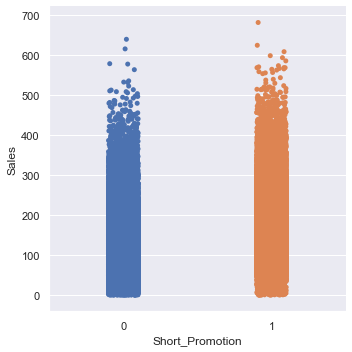

In [9]:
sns.catplot(x="Short_Promotion", y="Sales", data=train_df)

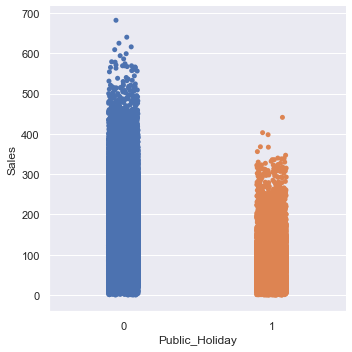

In [10]:
sns.catplot(x="Public_Holiday", y="Sales", data=train_df)

In [49]:
train_df.groupby('Course_Type').Course_ID.nunique()

Course_Type
Course     310
Degree       2
Program    288
Name: Course_ID, dtype: int64

In [50]:
train_df.Course_Type.value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

In [47]:
train_df[['Course_Type','Sales']].groupby('Course_Type').Sales.sum()

Course_Type
Course     29798462
Degree       324684
Program    31750751
Name: Sales, dtype: int64

In [44]:
train_df[['Course_Type','Sales']].groupby('Course_Type').Sales.mean()

Course_Type
Course     113.411236
Degree     184.061224
Program    128.246482
Name: Sales, dtype: float64

In [45]:
train_df[['Course_Type','Sales']].groupby('Course_Type').Sales.median()

Course_Type
Course     104
Degree     181
Program    117
Name: Sales, dtype: int64

In [37]:
train_df.loc[train_df.Public_Holiday==1,['Course_Type','Sales']].groupby('Course_Type').Sales.mean()

Course_Type
Course      73.514367
Degree     222.392857
Program     86.491326
Name: Sales, dtype: float64

In [39]:
train_df.loc[train_df.Public_Holiday==1,['Course_Type','Sales']].groupby('Course_Type').Sales.median()

Course_Type
Course      70.0
Degree     233.5
Program     86.0
Name: Sales, dtype: float64

In [38]:
train_df.loc[train_df.Public_Holiday==0,['Course_Type','Sales']].groupby('Course_Type').Sales.mean()

Course_Type
Course     114.732425
Degree     182.804450
Program    129.591131
Name: Sales, dtype: float64

In [40]:
train_df.loc[train_df.Public_Holiday==0,['Course_Type','Sales']].groupby('Course_Type').Sales.median()

Course_Type
Course     105
Degree     180
Program    118
Name: Sales, dtype: int64

In [12]:
train_df.groupby('Public_Holiday').Sales.sum()

Public_Holiday
0    60574246
1     1299651
Name: Sales, dtype: int64

In [13]:
train_df.groupby('Public_Holiday').Sales.count()

Public_Holiday
0    495885
1     16202
Name: Sales, dtype: int64

In [14]:
16202/1299651

0.012466423678356727

In [15]:
495885/60574246

0.008186399876937799

In [16]:
train_df.groupby('Long_Promotion').Sales.sum()

Long_Promotion
0    33142504
1    28731393
Name: Sales, dtype: int64

In [18]:
train_df.groupby('Short_Promotion').Sales.sum()

Short_Promotion
0    33377448
1    28496449
Name: Sales, dtype: int64

In [17]:
train_df.groupby('Long_Promotion').Sales.count()

Long_Promotion
0    261693
1    250394
Name: Sales, dtype: int64

In [ ]:
print()

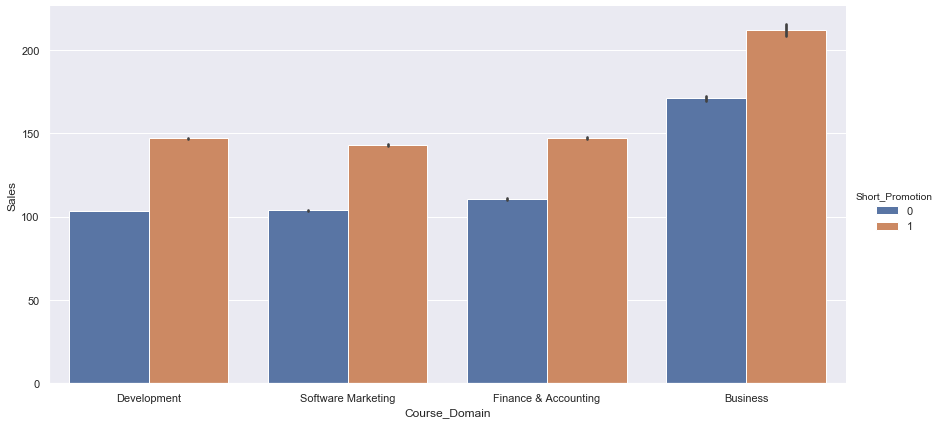

In [19]:
sns.catplot(x="Course_Domain", y="Sales",
                hue="Short_Promotion",
                data=train_df, kind="bar",
                height=6, aspect=2);

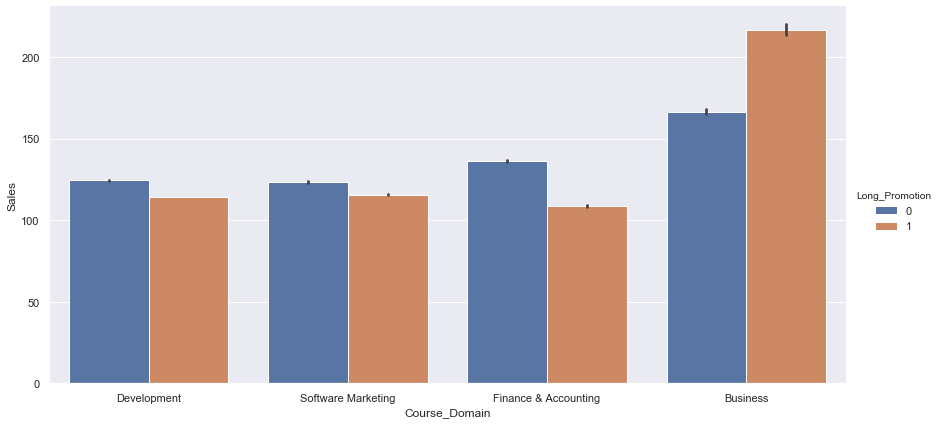

In [20]:
sns.catplot(x="Course_Domain", y="Sales",
                hue="Long_Promotion",
                data=train_df, kind="bar",
                height=6, aspect=2);

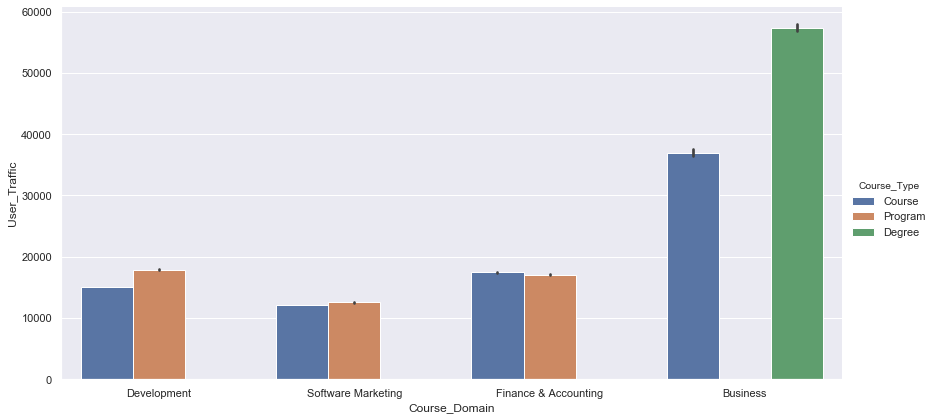

In [38]:
sns.catplot(x="Course_Domain", y="User_Traffic",
                hue="Course_Type",
                data=train_df, kind="bar",
                height=6, aspect=2);

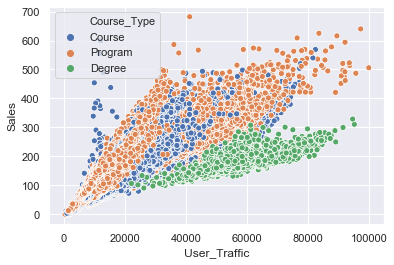

In [32]:
sns.scatterplot(x='User_Traffic',y='Sales',
             hue='Course_Type',
             data=train_df)

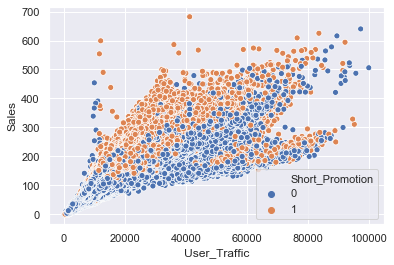

In [33]:
sns.scatterplot(x='User_Traffic',y='Sales',
             hue='Short_Promotion', 
             data=train_df)

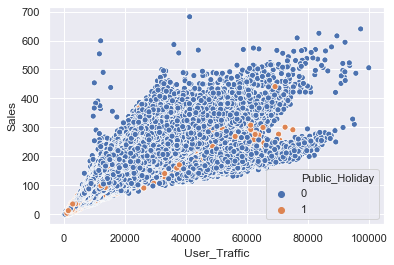

In [34]:
sns.scatterplot(x='User_Traffic',y='Sales',
             hue='Public_Holiday', 
             data=train_df)

In [60]:
temp_df = train_df.copy()
temp_df['Day_No'] = train_df['Day_No'].mod(365)

In [65]:
temp_df['Day_No'] = train_df['Day_No'].mod(365)
temp_df.groupby(['Course_ID','Day_No'], as_index=False).agg({
    'User_Traffic': 'std'  
})

Course_ID Day_No           User_Traffic                      
                                        unique     mean          std
0              1      0           [5628, 5292]   5460.0   237.587878
1              1      1    [11004, 1323, 1260]   4529.0  5607.602964
2              1      2  [13650, 11151, 11403]  12068.0  1375.833929
3              1      3   [11655, 11760, 7350]  10255.0  2516.351526
4              1      4    [12054, 6741, 5775]   8190.0  3381.000000
5              1      5    [6804, 5796, 15855]   9485.0  5539.556932
6              1      6  [10395, 17283, 15267]  14315.0  3541.308233
7              1      7  [16023, 15267, 14070]  15120.0   984.763423
8              1      8  [14385, 16716, 11907]  14336.0  2404.874425
9              1      9  [16485, 13503, 11004]  13664.0  2744.044642
10             1     10   [13377, 13188, 7266]  11277.0  3474.913092
11             1     11   [11319, 7518, 11151]   9996.0  2147.654302
12             1     12   [7077, 13146, 14469]  11564.0  3941.758364
13             1     13  [11802, 11592, 14595]  12663.0  1676.452505
14             1     14  [11130, 10437, 14700]  12089.0  2287.586720
15             1     15  [10773, 14133, 13272]  12726.0  1745.275623
16             1     16  [12411, 10647, 12033]  11697.0   928.760464
17             1     17    [8463, 10080, 7140]   8561.0  1472.447962
18             1     18    [9114, 6762, 12285]   9387.0  2771.602244
19             1     19   [6363, 10080, 11088]   9177.0  2488.566455
20             1     20   [8547, 15519, 10311]  11459.0  3624.999862
21             1     21  [13902, 14511, 12726]  13713.0   907.384703
22             1     22  [13776, 14280, 10164]  12740.0  2245.069264
23             1     23   [14490, 11151, 8778]  11473.0  2869.581677
24             1     24   [12222, 11151, 6846]  10073.0  2845.506458
25             1     25    [10962, 6090, 9093]   8715.0  2457.897272
26             1     26   [6363, 11130, 13398]  10297.0  3590.713439
27             1     27  [11256, 10647, 12075]  11326.0   716.568908
28             1     28  [10248, 10437, 15120]  11935.0  2759.909238
29             1     29   [9996, 11907, 11319]  11074.0   978.774233
...          ...    ...                    ...      ...          ...
218970       600    335          [7413, 12537]   9975.0  3623.215147
218971       600    336          [12285, 9345]  10815.0  2078.893937
218972       600    337          [9618, 11319]  10468.5  1202.788635
218973       600    338         [10416, 12054]  11235.0  1158.240908
218974       600    339         [11844, 13125]  12484.5   905.803787
218975       600    340         [10353, 12222]  11287.5  1321.582574
218976       600    341          [9156, 11466]  10311.0  1633.416665
218977       600    342           [9765, 9282]   9523.5   341.532575
218978       600    343           [8001, 8463]   8232.0   326.683333
218979       600    344           [7602, 8064]   7833.0   326.683333
218980       600    345           [7329, 8673]   8001.0   950.351514
218981       600    346           [7728, 8106]   7917.0   267.286363
218982       600    347          [9261, 11025]  10143.0  1247.336362
218983       600    348          [10857, 8085]   9471.0  1960.099997
218984       600    349          [7539, 15183]  11361.0  5405.124235
218985       600    350         [13944, 13251]  13597.5   490.024999
218986       600    351         [11802, 11613]  11707.5   133.643182
218987       600    352         [12159, 13251]  12705.0   772.160605
218988       600    353         [12243, 13566]  12904.5   935.502272
218989       600    354         [13524, 13650]  13587.0    89.095454
218990       600    355         [13902, 13209]  13555.5   490.024999
218991       600    356         [12159, 16254]  14206.5  2895.602269
218992       600    357         [18753, 17745]  18249.0   712.763635
218993       600    358           [7665, 8778]   8221.5   787.009847
218994       600    359           [8694, 9912]   9303.0   861.256059
21899

In [40]:
set(train_df.Course_ID.unique()) - set(test_df.Course_ID.unique())

set()

In [41]:
set(test_df.Course_ID.unique()) - set(train_df.Course_ID.unique())

set()

In [42]:
train_df.Short_Promotion.value_counts()

0    317369
1    194718
Name: Short_Promotion, dtype: int64

In [43]:
test_df.Short_Promotion.value_counts()

0    21600
1    14400
Name: Short_Promotion, dtype: int64

In [56]:
train_df.groupby(['Course_ID','Course_Domain'], as_index=False).agg(
{'User_Traffic':'nunique'}
).head()

,Course_ID,Course_Domain,User_Traffic
0,1,Development,442
1,2,Development,444
2,3,Development,532
3,4,Development,482
4,5,Development,340


In [57]:
def overall_preprocessing(df, is_test=False):
    df['Competition_Metric'] = df['Competition_Metric'].fillna(0.0)
    course_type = pd.get_dummies(df['Course_Type'])
    course_domain = pd.get_dummies(df['Course_Domain'])
    course_ids = pd.get_dummies(df['Course_ID'], prefix ='id')
    df_processed = pd.concat([df, course_type, course_domain, course_ids], axis=1)
    df_processed['Day_No'] = df_processed['Day_No'].mod(365)
    df_processed = df_processed.drop(columns = ['Course_ID','Course_Type','Course_Domain'])
    if is_test:
        return df_processed
    else:
        target = df_processed[['Sales']]
        df_processed = df_processed.drop(columns = ['Sales','User_Traffic'])
        return df_processed, target

In [58]:
df_train, df_target = overall_preprocessing(train_df)
df_pred = overall_preprocessing(test_df, True)

In [59]:
df_pred[df_train.columns]

,ID,Day_No,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Course,Degree,Program,Business,...,id_591,id_592,id_593,id_594,id_595,id_596,id_597,id_598,id_599,id_600
0,883,153,1,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,884,154,1,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,885,155,1,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,886,156,1,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,887,157,0,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,888,158,0,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,889,159,0,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,890,160,0,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,891,161,0,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,892,162,0,0,1,0.007,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
